In [32]:
from functions import *
from architectures import *

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


##     Base: by sku_id with promo, with promo flags

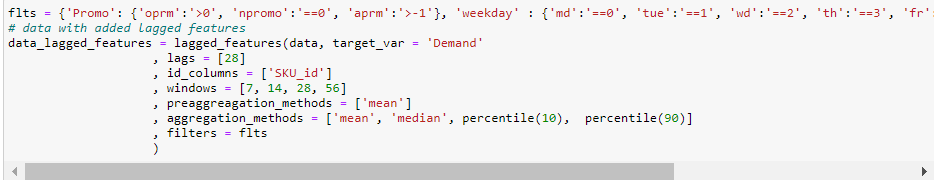

In [71]:
data_lagged_features = pd.read_csv('sku.csv')

In [59]:
df_train, df_test, target_mean, target_stdev, target, features = preprocess(data_lagged_features)

In [61]:
set_random_seed(7)

In [62]:
batch_size = 128
sequence_length = 30

train_dataset = SequenceDataset(
    df_train,
    target=target,
    features=features,
    sequence_length=sequence_length
)
test_dataset = SequenceDataset(
    df_test,
    target=target,
    features=features,
    sequence_length=sequence_length
)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=512, shuffle=False)
train_eval_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False)

X, y = next(iter(train_loader))

print("Features shape:", X.shape)
print("Target shape:", y.shape)

Features shape: torch.Size([128, 30, 392])
Target shape: torch.Size([128])


In [63]:
params = {
    'learning_rate' : 1e-3,
    'weight_decay' : 1e-5,
    'num_hidden_units' : 64,
    'loss_function' : nn.L1Loss(),
    'gamma' : 0,
    'shape' : data_lagged_features.shape,
    'epochs' : 3
}

model = ShallowRegressionLSTM(num_sensors=len(features), hidden_units=params['num_hidden_units'])
loss_function = params['loss_function']
optimizer = torch.optim.Adam(model.parameters(), lr=params['learning_rate'], weight_decay=params['weight_decay'])
scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=params['gamma'])

In [64]:
epochs = params['epochs']

train(df_train, epochs, train_loader, train_eval_loader,model,
      loss_function, optimizer, scheduler, batch_size, target_mean, target_stdev)

Epoch 0
---------


100%|████████████████████████████████████████████████████████████████████████████████| 651/651 [01:28<00:00,  7.38it/s]


Train loss: 0.3182502926174214


100%|████████████████████████████████████████████████████████████████████████████████| 651/651 [00:41<00:00, 15.62it/s]


Smape = 87.94699309239857

Epoch 1
---------


100%|████████████████████████████████████████████████████████████████████████████████| 651/651 [01:26<00:00,  7.51it/s]


Train loss: 0.2866049914773891


100%|████████████████████████████████████████████████████████████████████████████████| 651/651 [00:37<00:00, 17.31it/s]


Smape = 90.15440496076684

Epoch 2
---------


100%|████████████████████████████████████████████████████████████████████████████████| 651/651 [01:18<00:00,  8.34it/s]


Train loss: 0.2860691591799717


100%|████████████████████████████████████████████████████████████████████████████████| 651/651 [00:32<00:00, 20.31it/s]

Smape = 87.29922924520517



In [65]:
df_out = get_df_out(model, df_train, df_test, train_eval_loader, test_loader, target, target_mean, target_stdev)
ans = get_submission('test_kaggle.csv', df_out)

100%|██████████████████████████████████████████████████████████████████████████████████| 12/12 [00:01<00:00,  6.01it/s]


In [66]:
ans.to_csv('submission_sku.csv', index_label='id')

<AxesSubplot:xlabel='Date'>

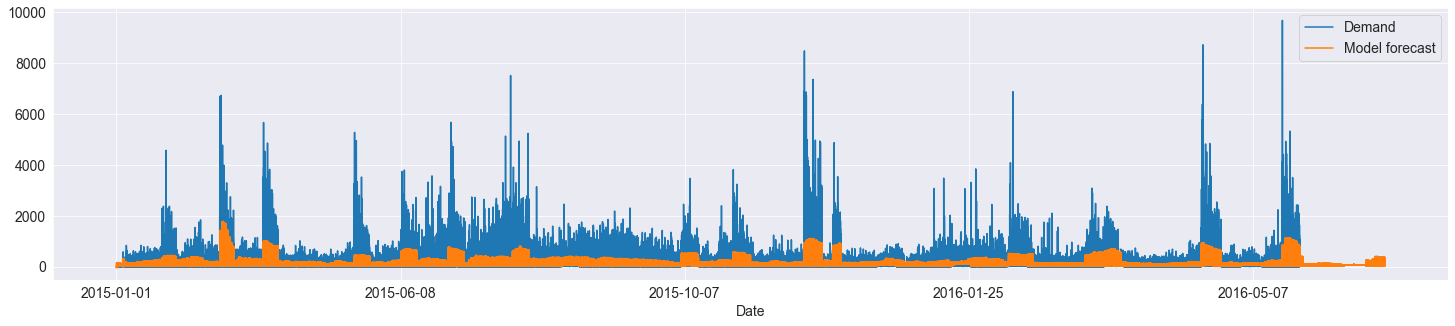

In [67]:
df_out.reset_index().drop(['Store_id', 'SKU_id'], axis=1).set_index('Date').sort_index().plot()

https://www.kaggle.com/c/atsf-fall21-hw3

## Было 87

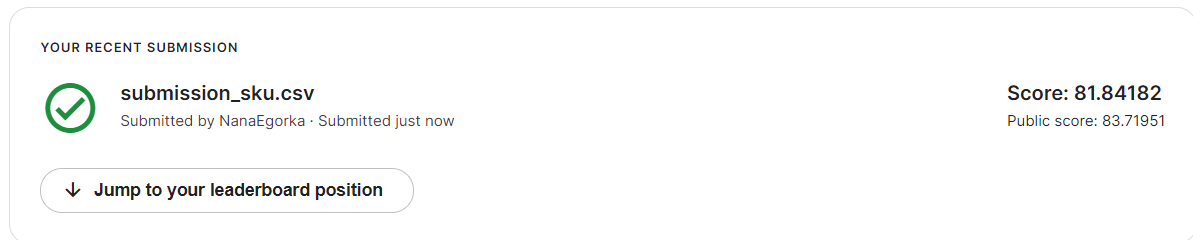

## -----------------------------------------------------------------------------------------------------------------------------

## by sku_id with promo, without promo flags

In [75]:
data_lagged_features = pd.read_csv('sku_no_promo.csv')

In [76]:
df_train, df_test, target_mean, target_stdev, target, features = preprocess(data_lagged_features)

In [77]:
set_random_seed(7)

In [78]:
batch_size = 128
sequence_length = 30

train_dataset = SequenceDataset(
    df_train,
    target=target,
    features=features,
    sequence_length=sequence_length
)
test_dataset = SequenceDataset(
    df_test,
    target=target,
    features=features,
    sequence_length=sequence_length
)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=512, shuffle=False)
train_eval_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False)

X, y = next(iter(train_loader))

print("Features shape:", X.shape)
print("Target shape:", y.shape)

Features shape: torch.Size([128, 30, 136])
Target shape: torch.Size([128])


In [79]:
params = {
    'learning_rate' : 1e-3,
    'weight_decay' : 1e-5,
    'num_hidden_units' : 64,
    'loss_function' : nn.L1Loss(),
    'gamma' : 0,
    'shape' : data_lagged_features.shape,
    'epochs' : 3
}

model = ShallowRegressionLSTM(num_sensors=len(features), hidden_units=params['num_hidden_units'])
loss_function = params['loss_function']
optimizer = torch.optim.Adam(model.parameters(), lr=params['learning_rate'], weight_decay=params['weight_decay'])
scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=params['gamma'])

In [80]:
epochs = params['epochs']

train(df_train, epochs, train_loader, train_eval_loader,model,
      loss_function, optimizer, scheduler, batch_size, target_mean, target_stdev)

Epoch 0
---------


100%|████████████████████████████████████████████████████████████████████████████████| 651/651 [01:04<00:00, 10.14it/s]


Train loss: 0.30603126000424136


100%|████████████████████████████████████████████████████████████████████████████████| 651/651 [00:34<00:00, 18.99it/s]


Smape = 86.10731751668868

Epoch 1
---------


100%|████████████████████████████████████████████████████████████████████████████████| 651/651 [01:12<00:00,  9.00it/s]


Train loss: 0.2752204794671312


100%|████████████████████████████████████████████████████████████████████████████████| 651/651 [00:32<00:00, 20.24it/s]


Smape = 95.03964976940706

Epoch 2
---------


100%|████████████████████████████████████████████████████████████████████████████████| 651/651 [01:10<00:00,  9.20it/s]


Train loss: 0.2757805194906009


100%|████████████████████████████████████████████████████████████████████████████████| 651/651 [00:32<00:00, 20.08it/s]

Smape = 87.57560662871364



In [81]:
df_out = get_df_out(model, df_train, df_test, train_eval_loader, test_loader, target, target_mean, target_stdev)
ans = get_submission('test_kaggle.csv', df_out)

100%|██████████████████████████████████████████████████████████████████████████████████| 12/12 [00:01<00:00,  6.67it/s]


In [82]:
ans.to_csv('submission_sku.csv', index_label='id')

<AxesSubplot:xlabel='Date'>

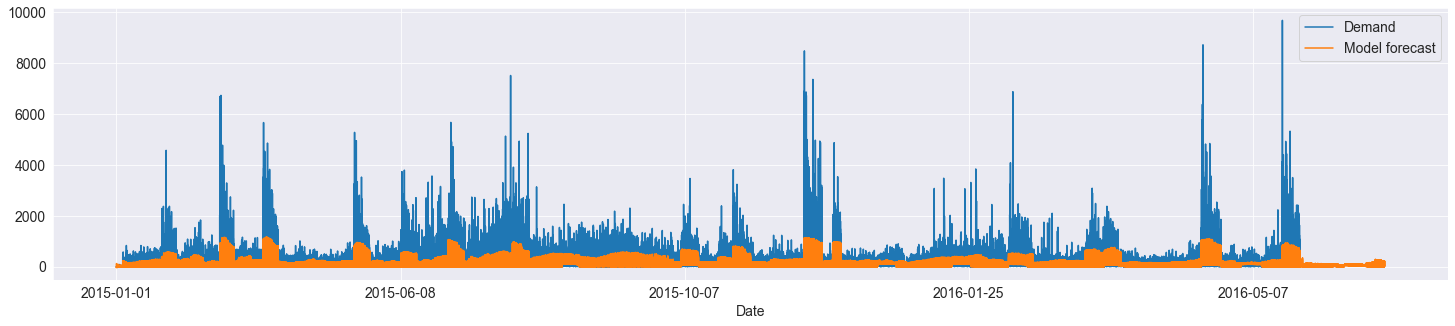

In [83]:
df_out.reset_index().drop(['Store_id', 'SKU_id'], axis=1).set_index('Date').sort_index().plot()

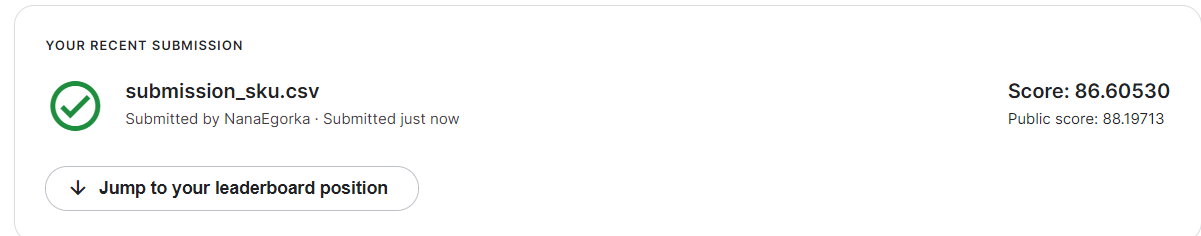

## -----------------------------------------------------------------------------------------------------------------------------